# Hyperparameter Tuning - Logistic Regression - Utkarsh Gaikwad

In [1]:
# Create synthetic Dataset
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=5,
                           n_classes=2,
                           random_state=1)

## Train Test Split

In [2]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20, random_state=42)

## Model Training using GridSearchCV

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l1','l2','elasticnet'),'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,10,20]}

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)

In [6]:
gcv = GridSearchCV(clf,param_grid=parameters,cv=5, verbose=1)

In [7]:
gcv.fit(xtrain , ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                               10, 20],
                         'penalty': ('l1', 'l2', 'elasticnet')},
             verbose=1)

In [8]:
gcv.best_params_

{'C': 0.4, 'penalty': 'l2'}

In [9]:
gcv.best_score_

0.81125

In [12]:
# Classifier final
classifier = LogisticRegression(penalty='l2',C=0.4, max_iter=200)
classifier.fit(xtrain,ytrain)

LogisticRegression(C=0.4, max_iter=200)

In [13]:
ytest_pred = classifier.predict(xtest)

In [14]:
ytest_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

<AxesSubplot: >

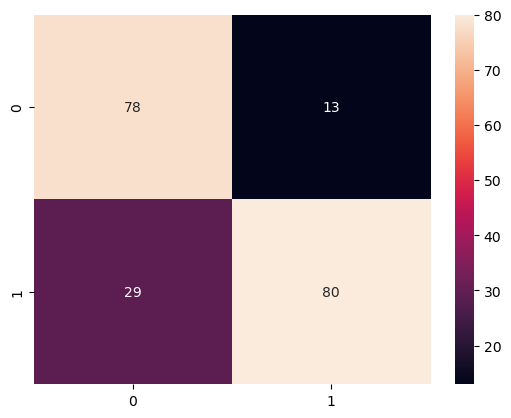

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cf, annot=True)

In [16]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



In [17]:
ytest_prob = classifier.predict_proba(xtest)

In [21]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(ytest, ytest_prob[:,-1])
print(f'Testing ROC AUC Score is : {roc:.4f}')

Testing ROC AUC Score is : 0.8695


## Randomized searchcv

In [22]:
from sklearn.model_selection import RandomizedSearchCV
clf = LogisticRegression(max_iter=200)

In [23]:
rcv = RandomizedSearchCV(clf, param_distributions=parameters, cv=5)

In [24]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1.0, 10, 20],
                                        'penalty': ('l1', 'l2', 'elasticnet')})

In [25]:
rcv.best_params_

{'penalty': 'l2', 'C': 0.4}

In [26]:
rcv.best_score_

0.81125